# Machine Learning 
## Udacity Project: Titanic Survival Exploration

In [9]:
# Importing libraries 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Importing supplementary visualizations code visuals.py
import visuals as vs

%matplotlib inline

# Loading the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Printing the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Storing the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Showing the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensuring that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculating and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Testing the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.



# Making Predictions

In [12]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predicting the survival of 'passenger'
        predictions.append(0)
    
    # Returning our predictions
    return pd.Series(predictions)

# Making the predictions
predictions = predictions_0(data)

### Question 1
*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*  


In [7]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


**Answer**:*The prediction that none of the passengers survived have an accuracy of 61.62%.*

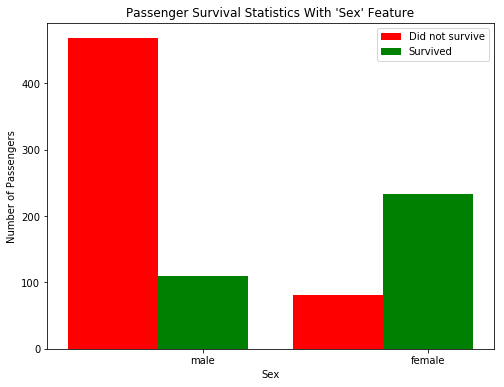

In [13]:
vs.survival_stats(data, outcomes, 'Sex')

In [47]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
    
        # prediction conditions
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
                    
        
    # Returning our predictions
    return pd.Series(predictions)

# Making the predictions
predictions = predictions_1(data)

### Question 2
*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*  

In [48]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


**Answer**:*The prediction that none of the passengers survived have an accuracy of 78.68%.*

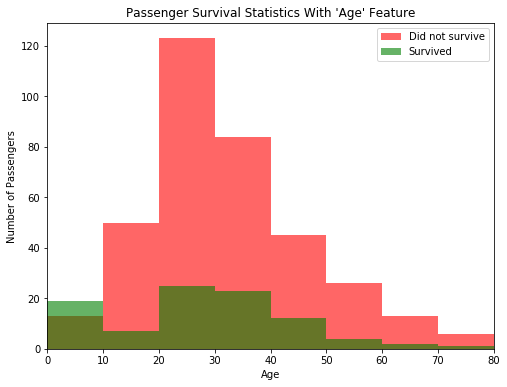

In [25]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [50]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        #prediction conditions 
              
        if passenger['Sex'] == 'female':
            predictions.append(1)
    
        elif passenger['Age'] < 10:
                predictions.append(1)
        else:
                predictions.append(0)
                
    # Returning our predictions
    return pd.Series(predictions)

# Making the predictions
predictions = predictions_2(data)

### Question 3
*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?*  

In [51]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


**Answer**: *The predictions that none of the passengers survived have an accuracy of 79.35%.*



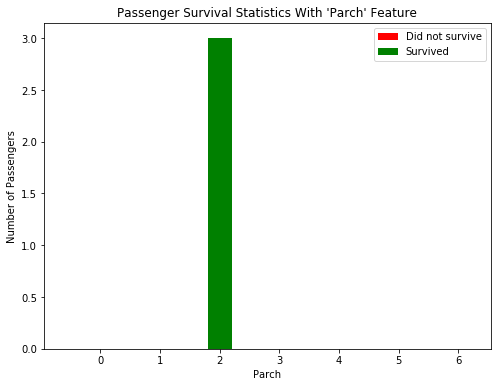

In [69]:
#vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

vs.survival_stats(data, outcomes, 'Parch', ["Sex == 'female'", "Parch > 1", "Pclass == 1", "Age > 25"])

In [166]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # prediction conditions 
        
        if passenger['Sex'] == 'female':
            if passenger['SibSp'] > 2:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if passenger['Age'] < 4:
                predictions.append(1)
            else:
                predictions.append(0)
                 
    # Returning our predictions
    return pd.Series(predictions)

# Making the predictions
predictions = predictions_3(data)

### Question 4
*Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?*  


In [167]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.58%.


**Answer:**
*I looked at all features and I noted that Sex, Age and Number of Siblings/Spouses Abroad
are more informative comparing to Passenger Class, Name, Number of Parents/ Children Aboard, Ticket Number, Passenger Fare, Cabin, Port of Embarkkation. 
Sex is the most informative feature. I used the condition of sex to split survival outcomes in the data.

My predictions that none of the passengers survived have an accuracy of 80.58%.*


# Conclusion

### Question 5
*Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.*  

**Answer**: * Predicting of "What word makes a book popular ?" can be an example of real-world scenario where supervised learning could be applied. In this example I will try to predict what words have the most impact on popularity of books. The outcome variable will be the Efficiency of words. The features about the data used in this scenario that might be helpful for making predictions will be Negative Word and Question Word.*